In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import statistics
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from google.colab import files
df = files.upload()
df = pd.read_excel("DATA PASIEN (numeric).xls")

Saving DATA PASIEN (numeric).xls to DATA PASIEN (numeric) (1).xls


ImportError: ignored

In [3]:
print(df.head())

AttributeError: ignored

In [ ]:
df.isnull().sum()

CLASS      0
STDEVPA    0
AVERAGE    0
x1         0
x2         0
          ..
x146       0
x147       0
x148       0
x149       0
x150       0
Length: 153, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 153 entries, CLASS to x150
dtypes: float64(150), int64(3)
memory usage: 50.3 KB


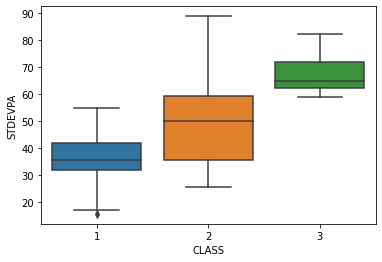

In [ ]:
sns.boxplot(x='CLASS', y='STDEVPA', data=df)

In [ ]:
x=df.drop(['CLASS','STDEVPA','AVERAGE'], axis=1)
y=df['CLASS']
model=GaussianNB()
score = cross_val_score (model, x, y, cv=10)
y_pred = cross_val_predict (model, x, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
score

array([0.8 , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.75, 1.  , 0.75])

In [ ]:
y_pred

array([1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 1, 2, 2, 2, 2,
       3, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 3, 2, 2, 1, 2, 2])

In [ ]:
print("Accuracy: %f" % (score.mean()*100))

Accuracy: 93.000000


In [ ]:
print(conf_mat)

[[17  1  0]
 [ 0 19  0]
 [ 0  2  3]]


In [ ]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.86      1.00      0.93        19
           3       1.00      0.60      0.75         5

    accuracy                           0.93        42
   macro avg       0.95      0.85      0.88        42
weighted avg       0.94      0.93      0.92        42



In [ ]:
print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

MAE: 0.07142857142857142
MSE: 0.07142857142857142
RMSE: 0.2672612419124244


In [ ]:
print(matthews_corrcoef(y, y_pred))

0.8836568377897412


Text(0.5, 15.0, 'Predicted label')

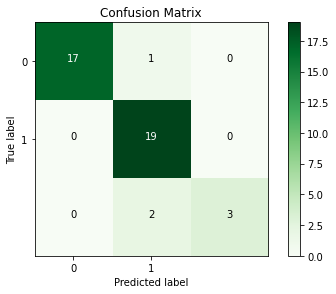

In [ ]:
classes = [0, 1]
# plot confusion matrix
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf_mat.max() / 2.
for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
    plt.text(j, i, format(conf_mat[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_mat[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

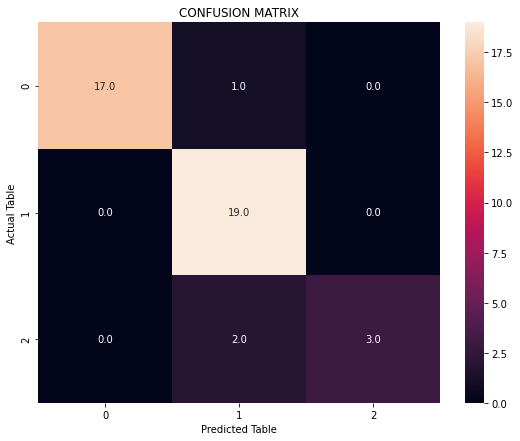

In [ ]:
f, ax = plt.subplots(figsize=(9,7))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="0.1f", ax=ax)
plt.xlabel("Predicted Table")
plt.ylabel("Actual Table")
plt.title("CONFUSION MATRIX")
plt.show()